In [4]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig




load the dataset 

In [5]:
#load your dataset here
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

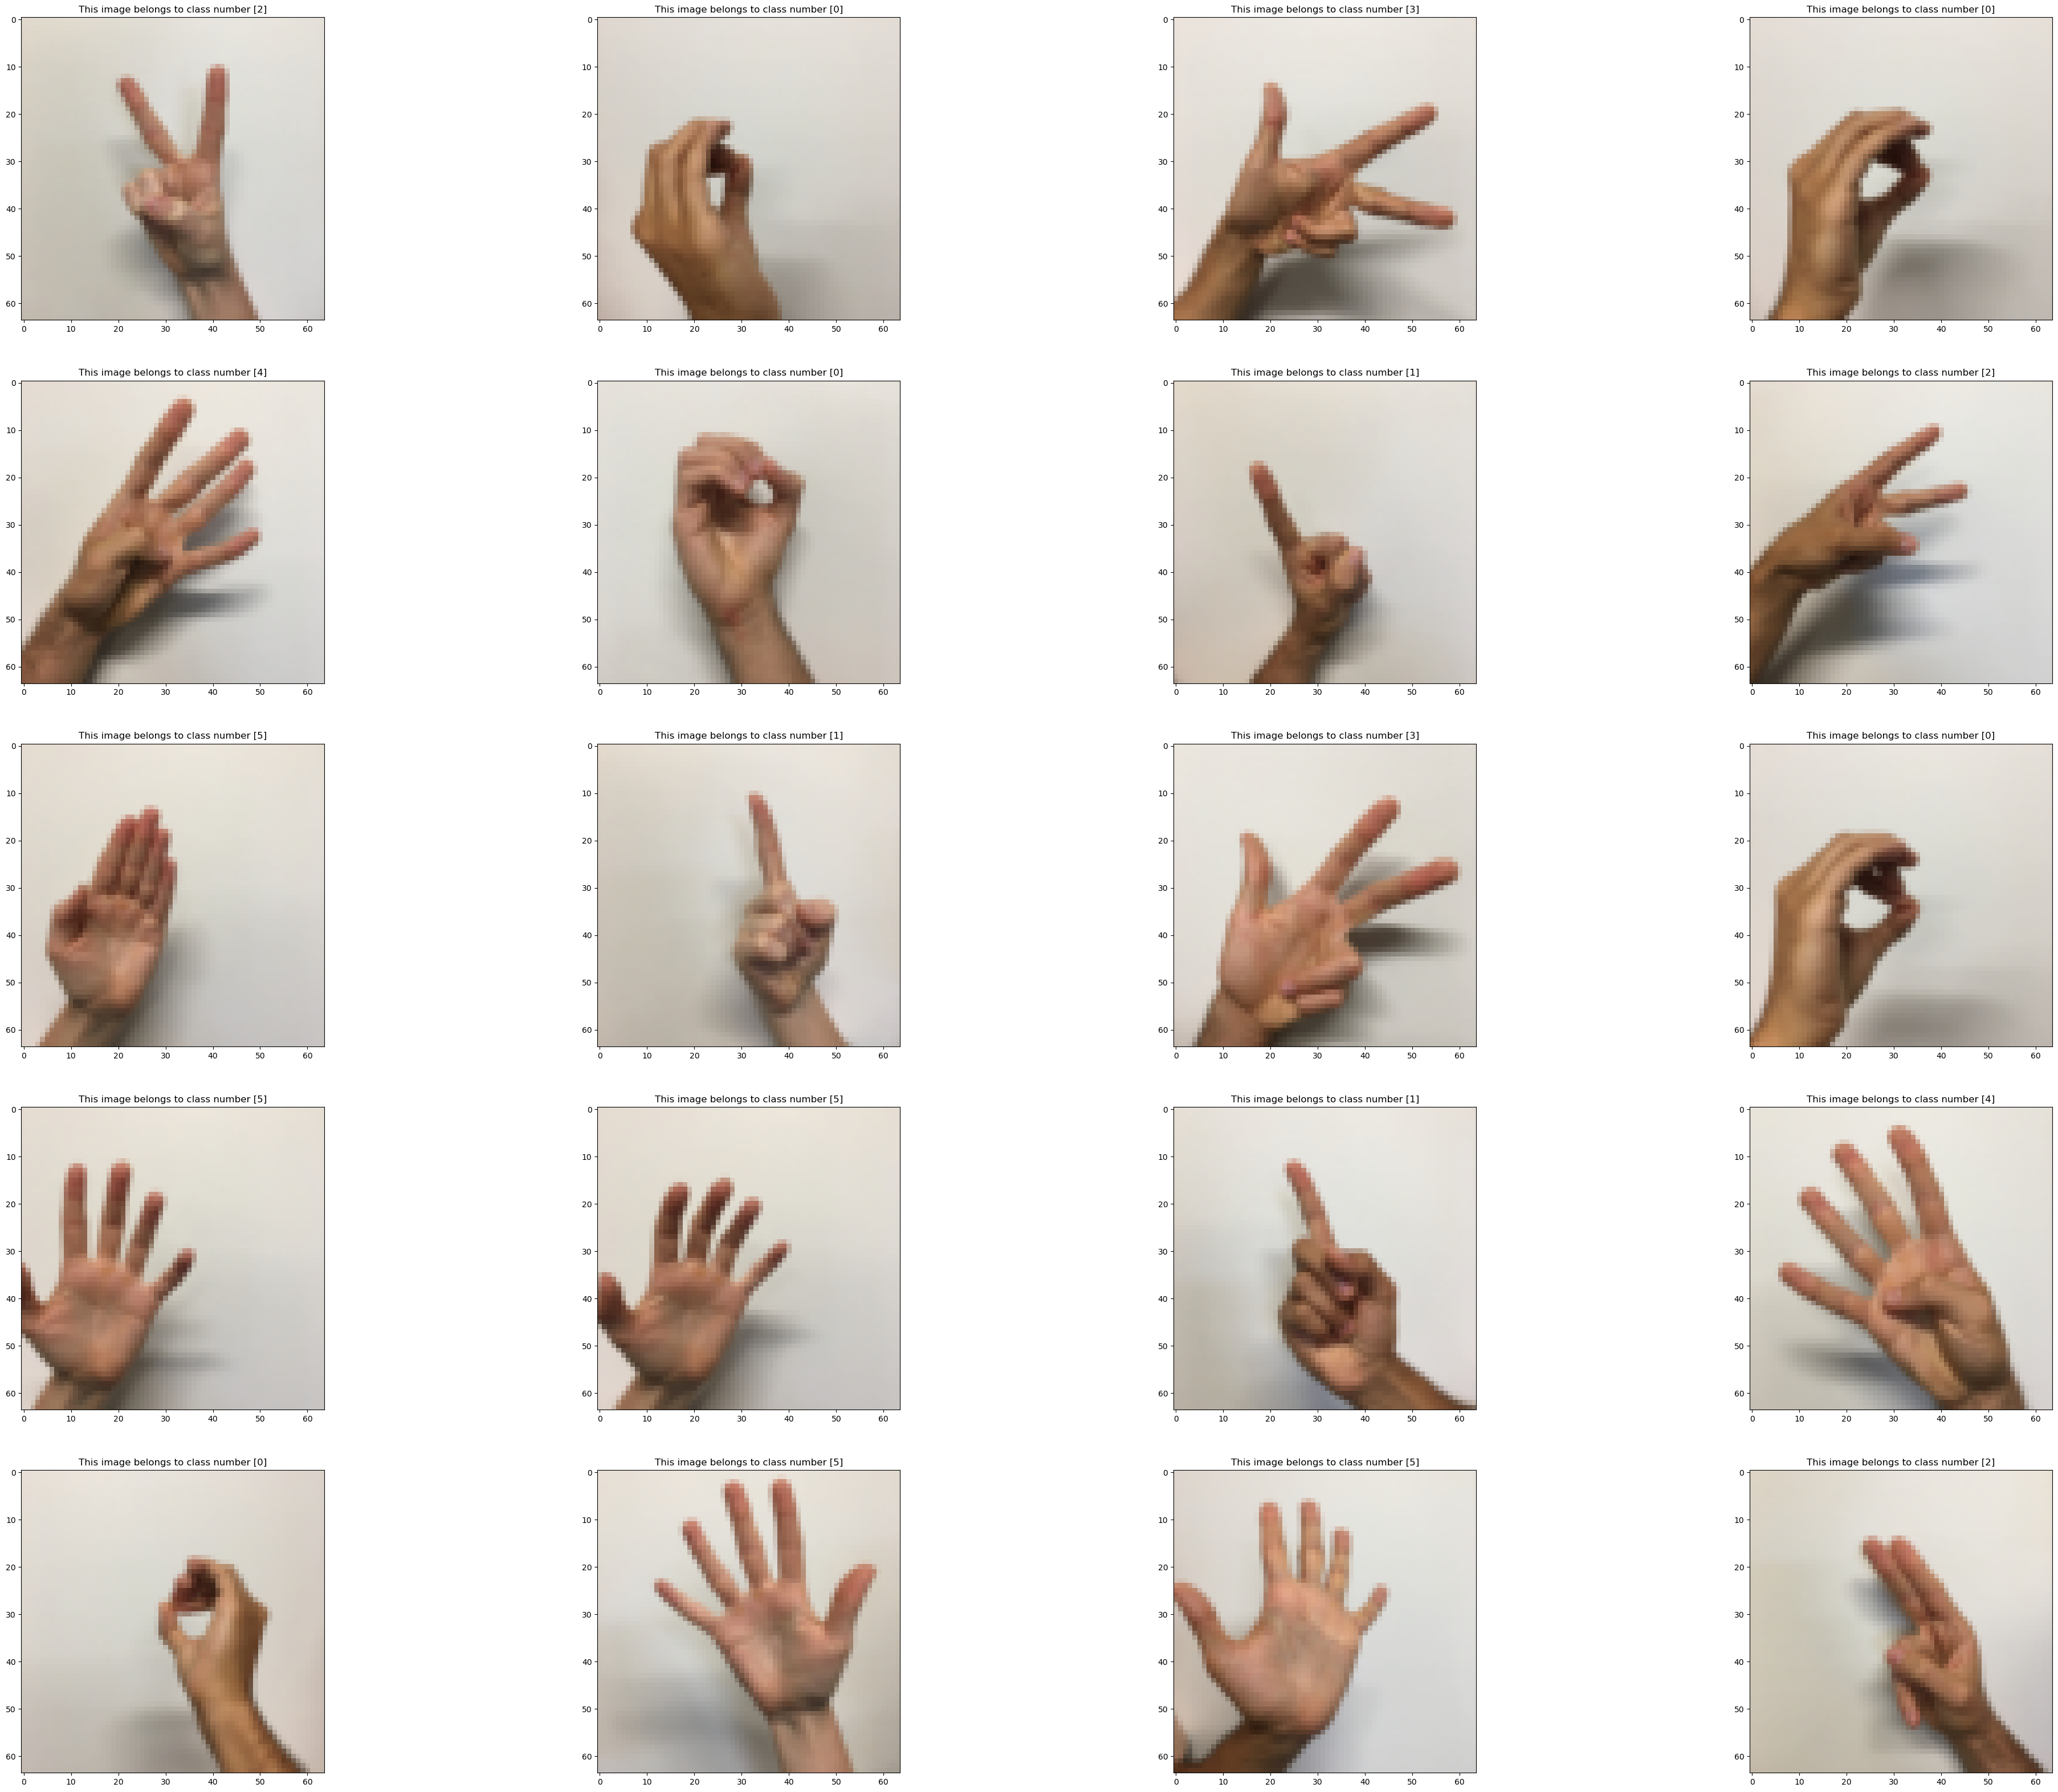

In [6]:
# Plot here 
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random.randint(low=0, high=len(X_train_orig)-1, size=20).tolist()
plt.figure(figsize=(50,40))
# loop to pick one number from the list and subplot it on its index
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(X_train_orig[i])
    plt.title('This image belongs to class number {}'.format(Y_train_orig[i]))

How many classes does the training and test dataset have?

In [7]:
# solve here
print('number of classes in the training dataset =' , len(np.unique(Y_train_orig)))
print('number of classes in the Test dataset =' , len(np.unique(Y_test_orig)))

number of classes in the training dataset = 6
number of classes in the Test dataset = 6


What is the dimension of the training dataset and test dataset?

In [8]:
# solve here
print('Shape of the training dataset =' , X_train_orig.shape)
print('Shape of the Test dataset =' , X_test_orig.shape)


Shape of the training dataset = (1080, 64, 64, 3)
Shape of the Test dataset = (120, 64, 64, 3)


Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [9]:
# Solve Here
X_train_orig = X_train_orig/255
X_test_orig = X_test_orig/255

## Build a Baseline Model

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [10]:
# solve here
import numpy as np
X_train=X_train_orig.flatten().reshape(1080,-1)
X_test=X_test_orig.flatten().reshape(120,-1)

Now you can apply some old fashion ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [11]:
# Solve here
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression( max_iter = 500)
mod.fit(X_train, Y_train_orig)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [12]:
from sklearn.metrics import confusion_matrix
print("Training accuracy score is ", mod.score(X_train, Y_train_orig))
print("Test accuracy score is ", mod.score(X_test, Y_test_orig))
print("Test cm is \n ", confusion_matrix(Y_test_orig, mod.predict(X_test)))

Training accuracy score is  1.0
Test accuracy score is  0.875
Test cm is 
  [[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  1 17  1  0  1]
 [ 1  0  1 16  1  1]
 [ 0  0  1  2 14  3]
 [ 0  0  1  1  0 18]]


# Build a DNN 
Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `SparseCategoricalCrossentropy`. Notice that, we already have a flattening layer in DNN, so you can actually use the normalized image without the flattening step that you have done earlier when you were building logistic regression

In [13]:
# from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(Flatten(input_shape = X_train_orig.shape[1:]))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [15]:
model.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3124 - accuracy: 0.8611 - val_loss: 0.7396 - val_accuracy: 0.7083
Epoch 2/500
11/11 [==============================] - 0s 10ms/step - loss: 0.2439 - accuracy: 0.9046 - val_loss: 0.7033 - val_accuracy: 0.7917
Epoch 3/500
11/11 [==============================] - 0s 9ms/step - loss: 0.2285 - accuracy: 0.9176 - val_loss: 0.6732 - val_accuracy: 0.7917
Epoch 4/500
11/11 [==============================] - 0s 9ms/step - loss: 0.2287 - accuracy: 0.9102 - val_loss: 0.6939 - val_accuracy: 0.7667
Epoch 5/500
11/11 [==============================] - 0s 9ms/step - loss: 0.2218 - accuracy: 0.9120 - val_loss: 0.7072 - val_accuracy: 0.7667
Epoch 6/500
11/11 [==============================] - 0s 8ms/step - loss: 0.2208 - accuracy: 0.9093 - val_loss: 0.7476 - val_accuracy: 0.7833
Epoch 7/500
11/11 [==============================] - 0s 8ms/step - loss: 0.2129 - accuracy: 0.9167 - val_loss: 0.7788 - val_accuracy: 0.7917
Epoch 8/500

### Learning Rate Optimizing
Did you notice that the it was not or learning was a little slow at the beginning? That is because of the keras learning rate is being high by default. Let's play around with the learning rate to give the DNN more change to learn. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

In [16]:
model = Sequential()
model.add(Flatten(input_shape = X_train_orig.shape[1:]))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [17]:
model.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 1s 25ms/step - loss: 2.1681 - accuracy: 0.1556 - val_loss: 1.8100 - val_accuracy: 0.1583
Epoch 2/500
11/11 [==============================] - 0s 12ms/step - loss: 1.8059 - accuracy: 0.1713 - val_loss: 1.7966 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 0s 11ms/step - loss: 1.8017 - accuracy: 0.1769 - val_loss: 1.7916 - val_accuracy: 0.1750
Epoch 4/500
11/11 [==============================] - 0s 10ms/step - loss: 1.7922 - accuracy: 0.1630 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 0s 10ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 0s 10ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 

Given the learning rate used in the previous part, Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

**note: it may take some time to run**

In [18]:
# Solve Here
model1 = Sequential()
model1.add(Flatten(input_shape = X_train_orig.shape[1:]))
model1.add(Dense(1000, activation='relu'))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(90, activation='relu'))
model1.add(Dense(6, activation='softmax'))
# Compile model
model1.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [19]:
model1.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 4s 212ms/step - loss: 3.4736 - accuracy: 0.1639 - val_loss: 3.2542 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 2s 187ms/step - loss: 2.4856 - accuracy: 0.1565 - val_loss: 3.1066 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 2s 189ms/step - loss: 2.2075 - accuracy: 0.1472 - val_loss: 1.8654 - val_accuracy: 0.1750
Epoch 4/500
11/11 [==============================] - 2s 196ms/step - loss: 1.8722 - accuracy: 0.1676 - val_loss: 1.8583 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 2s 187ms/step - loss: 1.8412 - accuracy: 0.1519 - val_loss: 1.8214 - val_accuracy: 0.2000
Epoch 6/500
11/11 [==============================] - 2s 186ms/step - loss: 1.7946 - accuracy: 0.2120 - val_loss: 1.7742 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 2s 200ms/step - loss: 1.7788 - accuracy: 0.1944 - val_loss: 1.7484 - val_accuracy: 0.1917

4/4 - 0s - loss: 1.0871 - accuracy: 0.9000 - 87ms/epoch - 22ms/step
4/4 [==============================] - 0s 10ms/step
test accuracy = 90.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.91      1.00      0.95        20
           2       1.00      0.85      0.92        20
           3       0.86      0.90      0.88        20
           4       0.75      0.75      0.75        20
           5       0.90      0.90      0.90        20

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



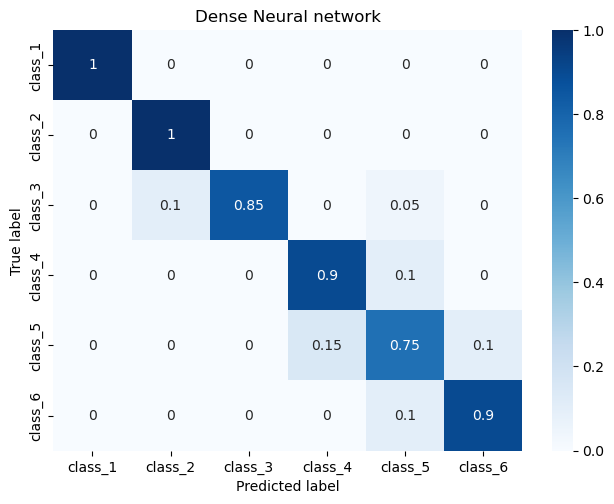

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
test_loss, test_acc = model1.evaluate(X_test_orig,  Y_test_orig, verbose=2)
Y_te = np.array(tf.math.argmax(model1.predict(X_test_orig), 1))
cm = tf.math.confusion_matrix(Y_test_orig, Y_te)


acc = metrics.accuracy_score(Y_test_orig, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test_orig, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test_orig, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["class_1","class_2","class_3","class_4","class_5","class_6"]

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Dense Neural network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:

from tensorflow.keras import regularizers, layers, activations

model5 = Sequential()
model5.add(Flatten(input_shape = X_train_orig.shape[1:]))
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(6, kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

# Compile model
model5.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Nadam(lr=0.0000075), metrics=['accuracy'])
history = model5.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))


Epoch 1/500
11/11 [==============================] - 6s 280ms/step - loss: 8.4299 - accuracy: 0.1546 - val_loss: 7.4231 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 3s 255ms/step - loss: 7.1799 - accuracy: 0.1759 - val_loss: 6.8794 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 3s 252ms/step - loss: 6.6998 - accuracy: 0.1593 - val_loss: 6.4411 - val_accuracy: 0.1667
Epoch 4/500
11/11 [==============================] - 3s 250ms/step - loss: 6.2903 - accuracy: 0.1574 - val_loss: 6.0836 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 3s 253ms/step - loss: 5.9461 - accuracy: 0.1769 - val_loss: 5.7707 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 3s 252ms/step - loss: 5.6482 - accuracy: 0.1602 - val_loss: 5.4891 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 3s 253ms/step - loss: 5.3799 - accuracy: 0.1611 - val_loss: 5.2411 - val_accuracy: 0.1667

In [21]:
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 12288)             0         
                                                                 
 dense_17 (Dense)            (None, 700)               8602300   
                                                                 
 dropout (Dropout)           (None, 700)               0         
                                                                 
 dense_18 (Dense)            (None, 800)               560800    
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_19 (Dense)            (None, 900)               720900    
                                                                 
 dropout_2 (Dropout)         (None, 900)              

4/4 - 0s - loss: 1.7918 - accuracy: 0.1667 - 183ms/epoch - 46ms/step
4/4 [==============================] - 0s 11ms/step
test accuracy = 16.666666666666664 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.17      1.00      0.29        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20

    accuracy                           0.17       120
   macro avg       0.03      0.17      0.05       120
weighted avg       0.03      0.17      0.05       120



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


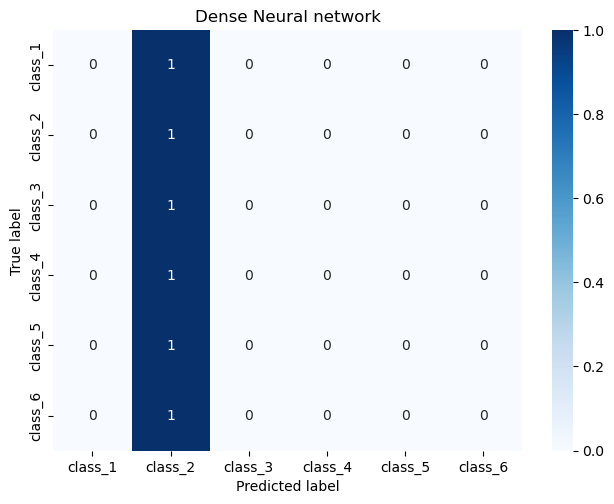

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
test_loss, test_acc = model5.evaluate(X_test_orig,  Y_test_orig, verbose=2)
Y_te = np.array(tf.math.argmax(model5.predict(X_test_orig), 1))
cm = tf.math.confusion_matrix(Y_test_orig, Y_te)


acc = metrics.accuracy_score(Y_test_orig, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test_orig, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test_orig, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["class_1","class_2","class_3","class_4","class_5","class_6"]

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Dense Neural network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
model6 = Sequential()
model6.add(Flatten(input_shape = X_train_orig.shape[1:]))
model6.add(layers.Dense(1000, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(800, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

# compile model - changed learning rate to be lower since with higher learning rate
# there was a lot of oscillation in the loss so previous model was having trouble converging
model6.compile(loss='SparseCategoricalCrossentropy', optimizer= tf.keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
# fit model and store accuracy/loss of training and validation to be used later to evaluate model
history=model6.fit(X_train_orig, Y_train_orig, epochs=350, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/350
11/11 [==============================] - 4s 265ms/step - loss: 8.0656 - accuracy: 0.1685 - val_loss: 6.2914 - val_accuracy: 0.1667
Epoch 2/350
11/11 [==============================] - 3s 239ms/step - loss: 5.7618 - accuracy: 0.1722 - val_loss: 5.2421 - val_accuracy: 0.1667
Epoch 3/350
11/11 [==============================] - 3s 239ms/step - loss: 4.9669 - accuracy: 0.1750 - val_loss: 4.6682 - val_accuracy: 0.1667
Epoch 4/350
11/11 [==============================] - 3s 236ms/step - loss: 4.5014 - accuracy: 0.1713 - val_loss: 4.3009 - val_accuracy: 0.1667
Epoch 5/350
11/11 [==============================] - 3s 237ms/step - loss: 4.1892 - accuracy: 0.1657 - val_loss: 4.0677 - val_accuracy: 0.1667
Epoch 6/350
11/11 [==============================] - 3s 236ms/step - loss: 3.9937 - accuracy: 0.1509 - val_loss: 3.9011 - val_accuracy: 0.1667
Epoch 7/350
11/11 [==============================] - 3s 242ms/step - loss: 3.8466 - accuracy: 0.1620 - val_loss: 3.7789 - val_accuracy: 0.1667

4/4 - 0s - loss: 1.7933 - accuracy: 0.1667 - 176ms/epoch - 44ms/step
4/4 [==============================] - 0s 12ms/step
test accuracy = 16.666666666666664 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.17      1.00      0.29        20
           5       0.00      0.00      0.00        20

    accuracy                           0.17       120
   macro avg       0.03      0.17      0.05       120
weighted avg       0.03      0.17      0.05       120



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


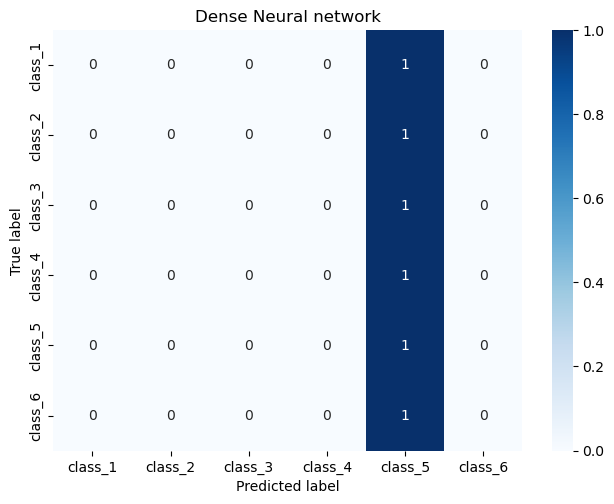

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
test_loss, test_acc = model6.evaluate(X_test_orig,  Y_test_orig, verbose=2)
Y_te = np.array(tf.math.argmax(model6.predict(X_test_orig), 1))
cm = tf.math.confusion_matrix(Y_test_orig, Y_te)


acc = metrics.accuracy_score(Y_test_orig, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test_orig, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test_orig, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["class_1","class_2","class_3","class_4","class_5","class_6"]

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Dense Neural network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()